In [7]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt

def show_loss(log_path, save_dir, filename, show_mode=True):
    with open(log_path, 'r') as f:
        res_log = json.load(f)

    #plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 18
    linewidth = 2

    loss_G_train, loss_G_val, loss_G_train_mean, loss_G_val_mean, \
        loss_D_train, loss_D_val, loss_D_train_mean, loss_D_val_mean, epoch = \
        [], [], [], [], [], [], [], [], []
    loss_mse_val, loss_mse_val_mean = [], []
    for n in range(1, len(res_log)+1):
        loss_G_train_mean.append(np.mean(res_log[str(n)]['loss_G_train_list']))
        loss_G_train.append(res_log[str(n)]['loss_G_train_list'])
        loss_G_val_mean.append(np.mean(res_log[str(n)]['loss_G_validation_list']))
        loss_G_val.append(res_log[str(n)]['loss_G_validation_list'])
        loss_D_train_mean.append(np.mean(res_log[str(n)]['loss_D_train_list']))
        loss_D_train.append(res_log[str(n)]['loss_D_train_list'])
        loss_D_val_mean.append(np.mean(res_log[str(n)]['loss_D_validation_list']))
        loss_D_val.append(res_log[str(n)]['loss_D_validation_list'])
        loss_mse_val_mean.append(np.mean(res_log[str(n)]['loss_mse_validation_list']))
        loss_mse_val.append(res_log[str(n)]['loss_mse_validation_list'])
        epoch.append(res_log[str(n)]['epoch'])

    color_train_G = '#990232'  # dark pink
    color_validation_G = '#FF6B9A'  # pink
    color_train_D = '#031e87'  # dark blue
    color_validation_D = '#4E6FF0'  # blue
    color_validation_mse = 'green'  # green  # '#4ef089'

    fig = plt.figure(figsize=(10, 8))
    plt.plot(epoch, np.mean(loss_G_train, axis=1), label='Train (G)', color=color_train_G, linewidth=linewidth, linestyle="dashed")
    plt.fill_between(epoch,
                     np.mean(loss_G_train, axis=1) - (1.96 * np.std(loss_G_train, ddof=1) / np.sqrt(len(loss_G_train))),
                     np.mean(loss_G_train, axis=1) + (1.96 * np.std(loss_G_train, ddof=1) / np.sqrt(len(loss_G_train))),
                     color=color_train_G, alpha=.1)

    plt.plot(epoch, np.mean(loss_G_val, axis=1), label='Validation (G)', color=color_validation_G, linewidth=linewidth)
    plt.fill_between(epoch,
                     np.mean(loss_G_val, axis=1) - (1.96 * np.std(loss_G_val, ddof=1) / np.sqrt(len(loss_G_val))),
                     np.mean(loss_G_val, axis=1) + (1.96 * np.std(loss_G_val, ddof=1) / np.sqrt(len(loss_G_val))),
                     color=color_validation_G, alpha=.1)

    plt.plot(epoch, np.mean(loss_D_train, axis=1), label='Train (D)', color=color_train_D, linewidth=linewidth, linestyle="dashed")
    plt.fill_between(epoch,
                     np.mean(loss_D_train, axis=1) - (1.96 * np.std(loss_D_train, ddof=1) / np.sqrt(len(loss_D_train))),
                     np.mean(loss_D_train, axis=1) + (1.96 * np.std(loss_D_train, ddof=1) / np.sqrt(len(loss_D_train))),
                     color=color_train_D, alpha=.1)

    plt.plot(epoch, np.mean(loss_D_val, axis=1), label='Validation (D)', color=color_validation_D, linewidth=linewidth)
    plt.fill_between(epoch,
                     np.mean(loss_D_val, axis=1) - (1.96 * np.std(loss_D_val, ddof=1) / np.sqrt(len(loss_D_val))),
                     np.mean(loss_D_val, axis=1) + (1.96 * np.std(loss_D_val, ddof=1) / np.sqrt(len(loss_D_val))),
                     color=color_validation_D, alpha=.1)

    # plt.plot(epoch, np.mean(loss_mse_val, axis=1), label='Validation (MSE)', color=color_validation_mse, linewidth=linewidth)
    # plt.fill_between(epoch,
    #                  np.mean(loss_mse_val, axis=1) - (1.96 * np.std(loss_mse_val, ddof=1) / np.sqrt(len(loss_D_val))),
    #                  np.mean(loss_mse_val, axis=1) + (1.96 * np.std(loss_mse_val, ddof=1) / np.sqrt(len(loss_D_val))),
    #                  color=color_validation_mse, alpha=.1)

    plt.xlabel('Epoch', size=18)
    plt.ylabel('Loss', size=18)
    #plt.title('best epoch={} losses={:.4f}'.format(epoch[np.argmin(loss_val_mean)]+1, np.min(loss_val_mean)), size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.grid(linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.legend(fontsize=18, loc='center left', bbox_to_anchor=(1., .5), frameon=False)

    ax = plt.gca()
    ax.spines["right"].set_linewidth(linewidth)
    ax.spines["top"].set_linewidth(linewidth)
    ax.spines["left"].set_linewidth(linewidth)
    ax.spines["bottom"].set_linewidth(linewidth)
    ax.set_axisbelow(True)

    plt.savefig(f"{save_dir}/{filename}.png", bbox_inches="tight", dpi=600)
    plt.savefig(f"{save_dir}/{filename}.pdf", bbox_inches="tight", dpi=600)

    if show_mode:
        plt.show()
    else:
        plt.close()
    del fig

    fig = plt.figure(figsize=(10, 8))
    plt.plot(epoch, loss_G_train_mean, label='Train (G)', color=color_train_G, linewidth=linewidth, linestyle="dashed")
    plt.plot(epoch, loss_G_val_mean, label='Validation (G)', color=color_validation_G, linewidth=linewidth)
    plt.plot(epoch, loss_D_train_mean, label='Train (D)', color=color_train_D, linewidth=linewidth, linestyle="dashed")
    plt.plot(epoch, loss_D_val_mean, label='Validation (D)', color=color_validation_D, linewidth=linewidth)
    #plt.plot(epoch, loss_mse_val_mean, label='Validation (MSE)', color=color_validation_mse, linewidth=linewidth)
    plt.xlabel('Epoch', size=18)
    plt.ylabel('Loss', size=18)
    #plt.title('best epoch={} losses={:.4f}'.format(epoch[np.argmin(loss_val_mean)]+1, np.min(loss_val_mean)), size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.yscale("symlog")
    plt.grid(which="major", linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.grid(which="minor", linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.legend(fontsize=18, loc='center left', bbox_to_anchor=(1., .5), frameon=False)

    ax = plt.gca()
    ax.spines["right"].set_linewidth(linewidth)
    ax.spines["top"].set_linewidth(linewidth)
    ax.spines["left"].set_linewidth(linewidth)
    ax.spines["bottom"].set_linewidth(linewidth)
    ax.set_axisbelow(True)

    plt.savefig(f"{save_dir}/{filename}_log.png", bbox_inches="tight", dpi=600)
    plt.savefig(f"{save_dir}/{filename}_log.pdf", bbox_inches="tight", dpi=600)

    if show_mode:
        plt.show()
    else:
        plt.close()
    del fig

    fig = plt.figure(figsize=(10, 8))
    plt.plot(epoch, np.mean(loss_G_train, axis=1), label='Train', color='#4E6FF0', linewidth=linewidth)
    plt.fill_between(epoch,
                     np.mean(loss_G_train, axis=1) - (1.96 * np.std(loss_G_train, ddof=1) / np.sqrt(len(loss_G_train))),
                     np.mean(loss_G_train, axis=1) + (1.96 * np.std(loss_G_train, ddof=1) / np.sqrt(len(loss_G_train))),
                     color='#4E6FF0', alpha=.1)

    plt.plot(epoch, np.mean(loss_G_val, axis=1), label='Validation', color='#FF6B9A', linewidth=linewidth)
    plt.fill_between(epoch,
                     np.mean(loss_G_val, axis=1) - (1.96 * np.std(loss_G_val, ddof=1) / np.sqrt(len(loss_G_val))),
                     np.mean(loss_G_val, axis=1) + (1.96 * np.std(loss_G_val, ddof=1) / np.sqrt(len(loss_G_val))),
                     color='#FF6B9A', alpha=.1)

    # plt.plot(epoch, np.mean(loss_mse_val, axis=1), label='Validation (MSE)', color=color_validation_mse, linewidth=linewidth)
    # plt.fill_between(epoch,
    #                  np.mean(loss_mse_val, axis=1) - (1.96 * np.std(loss_mse_val, ddof=1) / np.sqrt(len(loss_D_val))),
    #                  np.mean(loss_mse_val, axis=1) + (1.96 * np.std(loss_mse_val, ddof=1) / np.sqrt(len(loss_D_val))),
    #                  color=color_validation_mse, alpha=.1)

    plt.xlabel('Epoch', size=18)
    plt.ylabel('Loss', size=18)
    #plt.title('best epoch={} losses={:.4f}'.format(epoch[np.argmin(loss_val_mean)]+1, np.min(loss_val_mean)), size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.grid(linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.legend(fontsize=18, loc='center left', bbox_to_anchor=(1., .5), frameon=False)

    ax = plt.gca()
    ax.spines["right"].set_linewidth(linewidth)
    ax.spines["top"].set_linewidth(linewidth)
    ax.spines["left"].set_linewidth(linewidth)
    ax.spines["bottom"].set_linewidth(linewidth)
    ax.set_axisbelow(True)

    plt.savefig(f"{save_dir}/{filename}_generator.png", bbox_inches="tight", dpi=600)
    plt.savefig(f"{save_dir}/{filename}_generator.pdf", bbox_inches="tight", dpi=600)

    if show_mode:
        plt.show()
    else:
        plt.close()
    del fig

    fig = plt.figure(figsize=(10, 8))
    plt.plot(epoch, loss_G_train_mean, label='Train', color='#4E6FF0', linewidth=linewidth)
    plt.plot(epoch, loss_G_val_mean, label='Validation', color='#FF6B9A', linewidth=linewidth)
    #plt.plot(epoch, loss_mse_val_mean, label='Validation (MSE)', color=color_validation_mse, linewidth=linewidth)
    plt.xlabel('Epoch', size=18)
    plt.ylabel('Loss', size=18)
    #plt.title('best epoch={} losses={:.4f}'.format(epoch[np.argmin(loss_val_mean)]+1, np.min(loss_val_mean)), size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.yscale("log")
    plt.grid(which="major", linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.grid(which="minor", linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.legend(fontsize=18, loc='center left', bbox_to_anchor=(1., .5), frameon=False)

    ax = plt.gca()
    ax.spines["right"].set_linewidth(linewidth)
    ax.spines["top"].set_linewidth(linewidth)
    ax.spines["left"].set_linewidth(linewidth)
    ax.spines["bottom"].set_linewidth(linewidth)
    ax.set_axisbelow(True)

    plt.savefig(f"{save_dir}/{filename}_generator_log.png", bbox_inches="tight", dpi=600)
    plt.savefig(f"{save_dir}/{filename}_generator_log.pdf", bbox_inches="tight", dpi=600)

    if show_mode:
        plt.show()
    else:
        plt.close()
    del fig

    fig = plt.figure(figsize=(10, 8))

    plt.plot(epoch, np.mean(loss_D_train, axis=1), label='Train', color='#4E6FF0', linewidth=linewidth)
    plt.fill_between(epoch,
                     np.mean(loss_D_train, axis=1) - (1.96 * np.std(loss_D_train, ddof=1) / np.sqrt(len(loss_D_train))),
                     np.mean(loss_D_train, axis=1) + (1.96 * np.std(loss_D_train, ddof=1) / np.sqrt(len(loss_D_train))),
                     color='#4E6FF0', alpha=.1)

    plt.plot(epoch, np.mean(loss_D_val, axis=1), label='Validation', color='#FF6B9A', linewidth=linewidth)
    plt.fill_between(epoch,
                     np.mean(loss_D_val, axis=1) - (1.96 * np.std(loss_D_val, ddof=1) / np.sqrt(len(loss_D_val))),
                     np.mean(loss_D_val, axis=1) + (1.96 * np.std(loss_D_val, ddof=1) / np.sqrt(len(loss_D_val))),
                     color='#FF6B9A', alpha=.1)

    plt.xlabel('Epoch', size=18)
    plt.ylabel('Loss', size=18)
    #plt.title('best epoch={} losses={:.4f}'.format(epoch[np.argmin(loss_val_mean)]+1, np.min(loss_val_mean)), size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.grid(linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.legend(fontsize=18, loc='center left', bbox_to_anchor=(1., .5), frameon=False)

    ax = plt.gca()
    ax.spines["right"].set_linewidth(linewidth)
    ax.spines["top"].set_linewidth(linewidth)
    ax.spines["left"].set_linewidth(linewidth)
    ax.spines["bottom"].set_linewidth(linewidth)
    ax.set_axisbelow(True)

    plt.savefig(f"{save_dir}/{filename}_discriminator.png", bbox_inches="tight", dpi=600)
    plt.savefig(f"{save_dir}/{filename}_discriminator.pdf", bbox_inches="tight", dpi=600)

    if show_mode:
        plt.show()
    else:
        plt.close()
    del fig

    fig = plt.figure(figsize=(10, 8))
    plt.plot(epoch, loss_D_train_mean, label='Train', color='#4E6FF0', linewidth=linewidth)
    plt.plot(epoch, loss_D_val_mean, label='Validation', color='#FF6B9A', linewidth=linewidth)
    plt.xlabel('Epoch', size=18)
    plt.ylabel('Loss', size=18)
    #plt.title('best epoch={} losses={:.4f}'.format(epoch[np.argmin(loss_val_mean)]+1, np.min(loss_val_mean)), size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.yscale("symlog")
    plt.grid(which="major", linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.grid(which="minor", linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.legend(fontsize=18, loc='center left', bbox_to_anchor=(1., .5), frameon=False)

    ax = plt.gca()
    ax.spines["right"].set_linewidth(linewidth)
    ax.spines["top"].set_linewidth(linewidth)
    ax.spines["left"].set_linewidth(linewidth)
    ax.spines["bottom"].set_linewidth(linewidth)
    ax.set_axisbelow(True)

    plt.savefig(f"{save_dir}/{filename}_discriminator_log.png", bbox_inches="tight", dpi=600)
    plt.savefig(f"{save_dir}/{filename}_discriminator_log.pdf", bbox_inches="tight", dpi=600)

    if show_mode:
        plt.show()
    else:
        plt.close()
    del fig

    fig = plt.figure(figsize=(10, 8))

    plt.plot(epoch, np.mean(loss_mse_val, axis=1), label='Validation (MSE)', color=color_validation_mse, linewidth=linewidth)
    plt.fill_between(epoch,
                     np.mean(loss_mse_val, axis=1) - (1.96 * np.std(loss_mse_val, ddof=1) / np.sqrt(len(loss_D_val))),
                     np.mean(loss_mse_val, axis=1) + (1.96 * np.std(loss_mse_val, ddof=1) / np.sqrt(len(loss_D_val))),
                     color=color_validation_mse, alpha=.1)

    plt.xlabel('Epoch', size=18)
    plt.ylabel('MSE', size=18)
    #plt.title('best epoch={} losses={:.4f}'.format(epoch[np.argmin(loss_val_mean)]+1, np.min(loss_val_mean)), size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.grid(linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.legend(fontsize=18, loc='center left', bbox_to_anchor=(1., .5), frameon=False)

    ax = plt.gca()
    ax.spines["right"].set_linewidth(linewidth)
    ax.spines["top"].set_linewidth(linewidth)
    ax.spines["left"].set_linewidth(linewidth)
    ax.spines["bottom"].set_linewidth(linewidth)
    ax.set_axisbelow(True)

    plt.savefig(f"{save_dir}/mse.png", bbox_inches="tight", dpi=600)
    plt.savefig(f"{save_dir}/mse.pdf", bbox_inches="tight", dpi=600)

    if show_mode:
        plt.show()
    else:
        plt.close()
    del fig

    fig = plt.figure(figsize=(10, 8))
    plt.plot(epoch, loss_mse_val_mean, label='Validation (MSE)', color=color_validation_mse, linewidth=linewidth)
    plt.xlabel('Epoch', size=18)
    plt.ylabel('MSE', size=18)
    #plt.title('best epoch={} losses={:.4f}'.format(epoch[np.argmin(loss_val_mean)]+1, np.min(loss_val_mean)), size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.yscale("log")
    plt.grid(which="major", linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.grid(which="minor", linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.legend(fontsize=18, loc='center left', bbox_to_anchor=(1., .5), frameon=False)

    ax = plt.gca()
    ax.spines["right"].set_linewidth(linewidth)
    ax.spines["top"].set_linewidth(linewidth)
    ax.spines["left"].set_linewidth(linewidth)
    ax.spines["bottom"].set_linewidth(linewidth)
    ax.set_axisbelow(True)

    plt.savefig(f"{save_dir}/mse_log.png", bbox_inches="tight", dpi=600)
    plt.savefig(f"{save_dir}/mse_log.pdf", bbox_inches="tight", dpi=600)

    if show_mode:
        plt.show()
    else:
        plt.close()
    del fig

In [8]:
log_path = "/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/wsb/trial_wellplate_epoch100_batch28/train_fold1_20240301-012459/train/log.json"

save_dir = './visualize_loss/wsb/trial_wellplate_epoch100_batch28/train_fold1_20240301-012459/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

show_loss(
    log_path=log_path,
    save_dir=save_dir ,
    filename="losses",
    show_mode=False
)

In [11]:
def show_metrics(eval_metrics, log_path, save_dir, show_mode=True):
    with open(log_path, 'r') as f:
        res_log = json.load(f)

    #plt.rcParams["font.family"] = "Arial"
    plt.rcParams["font.size"] = 18
    linewidth = 2

    color = 'green'
    data_range = 65535

    fig = plt.figure(figsize=(10, 8))#(18, 10)
    metrics_val, epoch = [], []
    for n in range(1, len(res_log)+1):
        vals = res_log[str(n)][f'{eval_metrics}_validation_list']
        vals_corrected = [v/(data_range**2) for v in vals]
        metrics_val.append(vals_corrected)
        epoch.append(res_log[str(n)]['epoch'])

    plt.plot(epoch, np.mean(metrics_val, axis=1), label='Validation (MSE)', color=color, linewidth=linewidth)
    plt.fill_between(epoch,
                     np.mean(metrics_val, axis=1) - (1.96 * np.std(metrics_val, ddof=1) / np.sqrt(len(metrics_val))),
                     np.mean(metrics_val, axis=1) + (1.96 * np.std(metrics_val, ddof=1) / np.sqrt(len(metrics_val))),
                     color=color, alpha=.1)
    plt.xlabel('Epoch', size=18)
    ylabel = eval_metrics.upper()
    ylabel = ylabel.replace("_", " ")
    plt.ylabel(f'{ylabel}', size=18)
    #plt.title('best epoch={} {}={:.4f}'.format(epoch[np.argmax(metrics_val)]+1, eval_metrics.replace("_", " "), np.max(metrics_val)), size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.grid(linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.legend(fontsize=18, loc='center left', bbox_to_anchor=(1., .5), frameon=False)

    ax = plt.gca()
    ax.spines["right"].set_linewidth(linewidth)
    ax.spines["top"].set_linewidth(linewidth)
    ax.spines["left"].set_linewidth(linewidth)
    ax.spines["bottom"].set_linewidth(linewidth)
    ax.set_axisbelow(True)

    plt.savefig(f"{save_dir}/{eval_metrics}.png", bbox_inches="tight", dpi=600)
    plt.savefig(f"{save_dir}/{eval_metrics}.pdf", bbox_inches="tight", dpi=600)

    if show_mode:
        plt.show()
    else:
        plt.close()
    del fig

    fig = plt.figure(figsize=(10, 8))
    plt.plot(epoch, np.mean(metrics_val, axis=1), label='Validation (MSE)', color=color, linewidth=linewidth)
    plt.xlabel('Epoch', size=18)
    ylabel = eval_metrics.upper()
    ylabel = ylabel.replace("_", " ")
    plt.ylabel(f'{ylabel}', size=18)
    #plt.title('best epoch={} losses={:.4f}'.format(epoch[np.argmin(loss_val_mean)]+1, np.min(loss_val_mean)), size=18)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.yscale("log")
    plt.grid(which="major", linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.grid(which="minor", linestyle='--', color="lightgray", linewidth=linewidth/4, alpha=0.5)
    plt.legend(fontsize=18, loc='center left', bbox_to_anchor=(1., .5), frameon=False)

    ax = plt.gca()
    ax.spines["right"].set_linewidth(linewidth)
    ax.spines["top"].set_linewidth(linewidth)
    ax.spines["left"].set_linewidth(linewidth)
    ax.spines["bottom"].set_linewidth(linewidth)
    ax.set_axisbelow(True)

    plt.savefig(f"{save_dir}/{eval_metrics}_log.png", bbox_inches="tight", dpi=600)
    plt.savefig(f"{save_dir}/{eval_metrics}_log.pdf", bbox_inches="tight", dpi=600)

    if show_mode:
        plt.show()
    else:
        plt.close()
    del fig

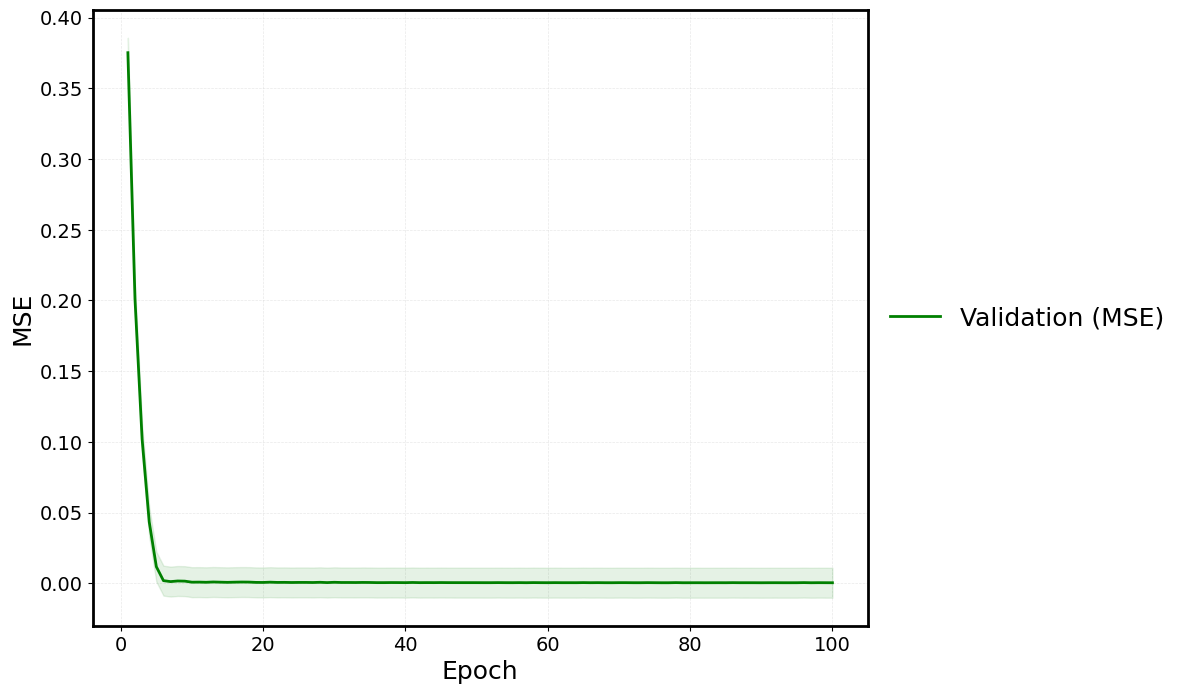

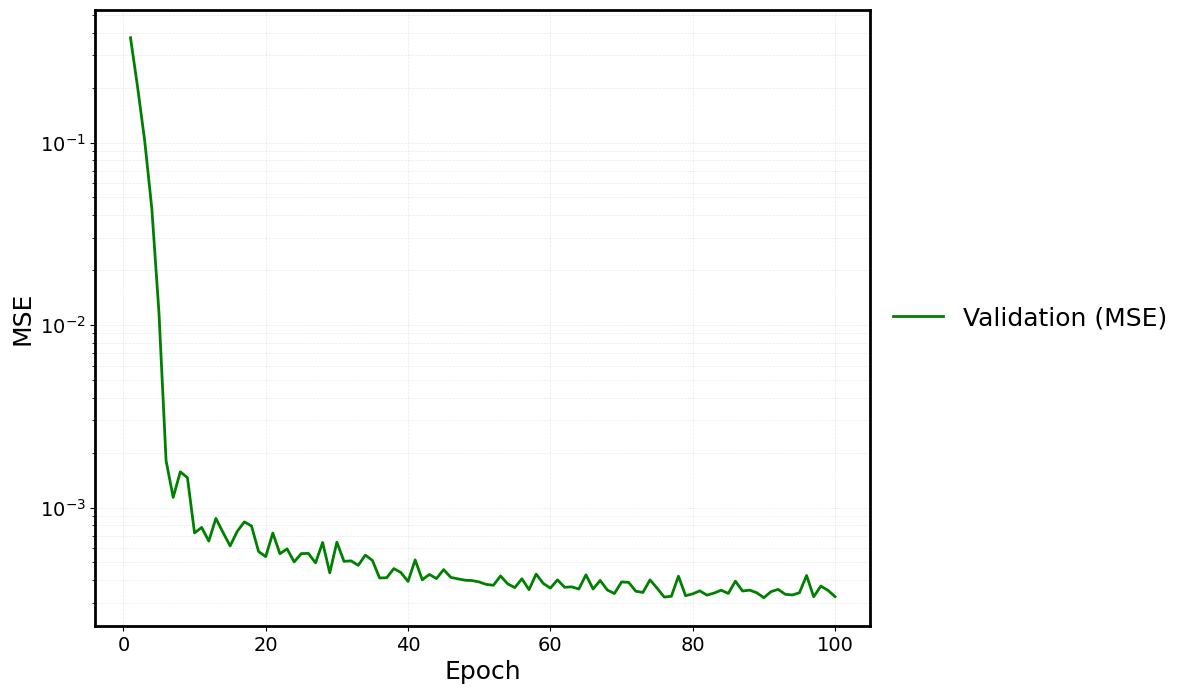

In [12]:
log_path = '/Users/morikura/Documents/Ozeki/pairedimagetoimagetranslation/results/cwgangp/trial_wellplate_epoch100_batch28/train_fold5_20240319-094042/train/log.json'
save_dir = './visualize_loss/cwgangp/trial_wellplate_epoch100_batch28/train_fold5_20240319-094042/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

show_metrics(eval_metrics='mse',
            log_path=log_path,
            save_dir=save_dir,
            show_mode=True)